In [1]:
import Pkg; Pkg.activate("..")
using Revise
using TEQUILA
using Equilibrium
using MillerExtendedHarmonic
using Optim
using Plots
using BenchmarkTools
using LinearAlgebra
using FiniteElementHermite
using StaticArrays
using NLsolve

  Activating project at `~/.julia/dev/TEQUILA`


In [2]:
Ψ, _ = read_geqdsk("../sample/g_chease_mxh", clockwise_phi=false)
Rbnd = [1.4835178156219313, 1.4751077671753525, 1.4602394328985497, 1.4388380419389455, 1.4108807338529168, 1.3764483277806405, 1.3357804753627627, 1.2893244149041314, 1.2377668623272875, 1.1820398871874687, 1.1232951972509257, 1.0628467019418477, 1.0020874242222966, 0.9423921857519185, 0.8850204560024655, 0.8310334333940519, 0.7812359419834862, 0.7361481974776741, 0.6960065889264038, 0.6607879267949847, 0.6302491076665837, 0.6039739971357191, 0.581420982624028, 0.5619671697773423, 0.544947663954185, 0.5296901416465357, 0.515545712237456, 0.5019169852256711, 0.48828360010109495, 0.4742246220125431, 0.4594364798717472, 0.44374473391905406, 0.4271079981748529, 0.409612810526308, 0.39145907858607404, 0.37293682088983754, 0.35439610416262285, 0.3362131315257383, 0.3187561275885247, 0.30235480008510673, 0.28727665162877747, 0.27371234360083185, 0.26177090083856946, 0.2514841006517634, 0.24281821459282615, 0.23569057230552082, 0.22998825597144357, 0.22558653443943544, 0.22236523847997325, 0.22022196524730508, 0.21908161380297597, 0.21890219366643027, 0.21967708989569368, 0.22143404980091086, 0.22423115491890488, 0.22815004304607933, 0.23328671710624138, 0.2397404522109191, 0.24760157626101642, 0.25693919736484827, 0.26779019905703894, 0.2801509311967597, 0.29397291970282646, 0.30916357450299925, 0.3255923216264419, 0.3431019063582449, 0.36152392991750903, 0.380697117889242, 0.4004864731636038, 0.42080138642476533, 0.44161095015067714, 0.4629550828808725, 0.48495052398367755, 0.5077912058015006, 0.531742869974298, 0.5571320250991906, 0.5843294476842027, 0.6137284604716512, 0.6457182765253558, 0.6806528923241719, 0.7188164573588416, 0.7603867949570597, 0.8053997480153771, 0.8537180834199077, 0.9050094850040493, 0.9587383009186167, 1.0141748445222794, 1.070424043788906, 1.1264722926505406, 1.181248040399161, 1.2336887703414552, 1.2828053785623097, 1.3277351004668447, 1.3677760954530462, 1.4024001249678741, 1.4312436339749626, 1.4540810908128134, 1.4707869822179531, 1.4812940883304169, 1.4855556251025055, 1.4835178156219313]
Zbnd = [-0.06745063500000004, -0.1390018250113284, -0.21027063516431138, -0.2809758000248973, -0.35083827860949884, -0.41958235563227286, -0.4869367296273919, -0.5526355836519838, -0.6164196343441647, -0.6780371551960134, -0.7372449700030954, -0.7938094125698445, -0.8475072488832859, -0.898126558115698, -0.945467568979303, -0.9893434481322729, -1.0295810375245735, -1.0660215377736795, -1.0985211348731885, -1.1269515677610018, -1.1512006345071417, -1.1711726351235048, -1.1867887492479983, -1.1979873472124964, -1.2047242332669859, -1.2069728200000003, -1.2047242332669859, -1.1979873472124964, -1.1867887492479983, -1.1711726351235052, -1.1512006345071417, -1.1269515677610022, -1.0985211348731885, -1.0660215377736795, -1.0295810375245738, -0.9893434481322729, -0.945467568979303, -0.8981265581156979, -0.8475072488832861, -0.7938094125698448, -0.7372449700030955, -0.6780371551960134, -0.6164196343441646, -0.5526355836519841, -0.48693672962739215, -0.419582355632273, -0.3508382786094989, -0.2809758000248973, -0.2102706351643117, -0.13900182501132863, -0.06745063500000018, 0.004100555011328291, 0.07536936516431134, 0.14607453002489693, 0.21593700860949855, 0.2846810856322726, 0.3520354596273918, 0.4177343136519837, 0.4815183643441642, 0.5431358851960131, 0.6023437000030951, 0.6589081425698444, 0.7126059788832859, 0.7632252881156976, 0.810566298979303, 0.8544421781322727, 0.8946797675245731, 0.9311202677736794, 0.9636198648731881, 0.9920502977610021, 1.0162993645071414, 1.036271365123505, 1.0518874792479984, 1.0630860772124961, 1.0698229632669856, 1.07207155, 1.0698229632669856, 1.0630860772124961, 1.0518874792479984, 1.036271365123505, 1.0162993645071419, 0.9920502977610023, 0.9636198648731883, 0.9311202677736796, 0.8946797675245733, 0.8544421781322731, 0.8105662989793033, 0.7632252881156979, 0.7126059788832861, 0.6589081425698444, 0.6023437000030956, 0.5431358851960139, 0.4815183643441646, 0.41773431365198405, 0.35203545962739174, 0.284681085632273, 0.21593700860949944, 0.14607453002489734, 0.07536936516431175, 0.004100555011328194, -0.06745063499999976]
bnd = MXH(Rbnd, Zbnd, 5)
shot = Shot(21, 21, bnd, Ψ);

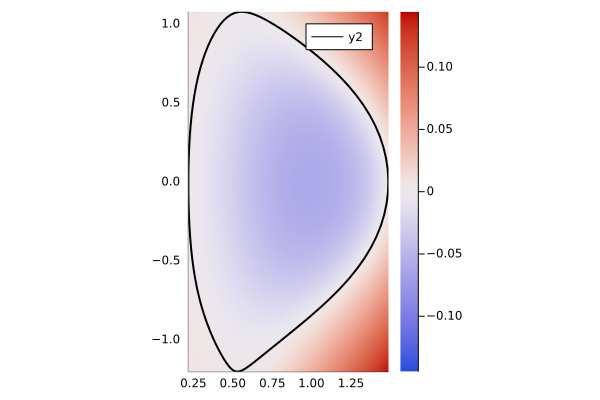

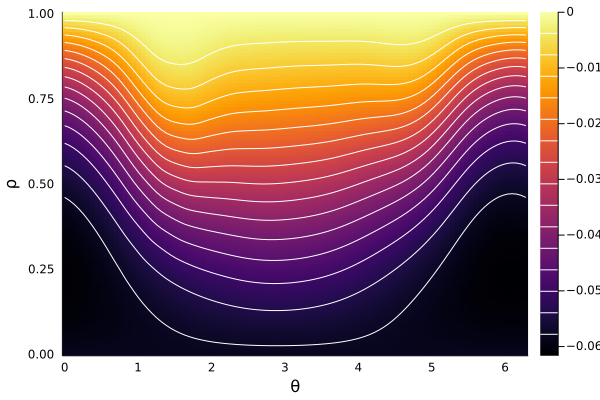

In [3]:
Rs = range(minimum(Rbnd), maximum(Rbnd), 129)
Zs = range(minimum(Zbnd), maximum(Zbnd), 129)
P = [Ψ(r,z) for z in Zs, r in Rs]
cmax = maximum(abs.(P))
p = heatmap(Rs, Zs, P, aspect_ratio=:equal, c=:diverging, clim=(-cmax,cmax))
plot!(Rbnd, Zbnd, color=:black, lw=2, xrange=(Rs[1], Rs[end]), yrange=(Zs[1], Zs[end]))
display(p)
plot_shot(shot, :ρθ)

In [11]:
inside(x, S::Union{MXH, AbstractVector{<:Real}}) = in_surface(x[1], x[2], S)
outside(S::Union{MXH, AbstractVector{<:Real}}, x) = !in_surface(x[1], x[2], S);

[0.9147244517444588, 0.39729038839493314]
(9, 10)
-90.0
-65.0


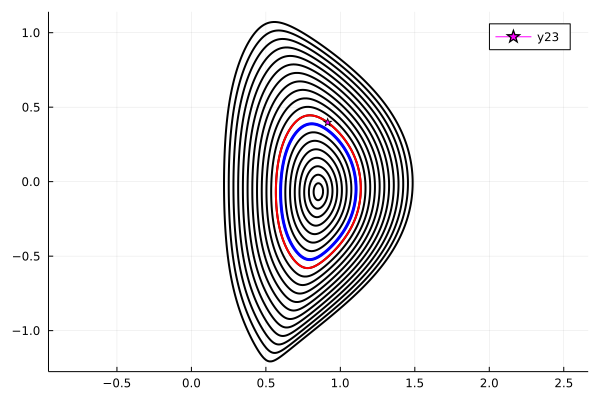

In [14]:
@views bnd  = shot.surfaces[:, end]
L = (length(bnd) - 5) ÷ 2
R0 = bnd[1]
Z0 = bnd[2]
ϵ = bnd[3]
κ = bnd[4]
c0 = bnd[5]
@views c = bnd[6:(5 + L)]
@views s = bnd[(6 + L):end]
a = R0*ϵ 
b = a * κ

Rs = range(R0-a, R0+a, 1001)
Zs = range(Z0-b, Z0+b, 1001)
R = rand(Rs)
Z = rand(Zs)

S1 = MXH(shot.surfaces[:, 10])
R, Z = S1((-65)*π/180.)
x = [R, Z]
println(x)

surfaces = [eachcol(shot.surfaces)...]

ki = searchsortedlast(surfaces, x, lt=inside)
ko = searchsortedfirst(surfaces, x, lt=outside)
println((ki, ko))

ki>=1 && println(nearest_angle(R, Z, surfaces[ki])*(180/π))
ko<=length(shot.surfaces) && println(nearest_angle(R, Z, surfaces[ko])*(180/π))

p = plot(aspect_ratio=:equal)
@views for S in surfaces[2:end]
    plot!(p, MXH(S), lw=2, color=:black)
end
ki>1 && plot!(p, MXH(surfaces[ki]), lw=3, color=:blue)
ko<=length(shot.surfaces) && plot!(p, MXH(surfaces[ko]), lw=2, color=:red)
plot!([R], [Z], marker=:star, color=:magenta)
display(p)

In [199]:
function ρθ_io(shot::Shot, R::Real, Z::Real)

    x = SVector(R, Z)
    
    Nrow, Ncol = size(shot.surfaces)
    
    get_col(k::Integer) = @views shot.surfaces[:, k]
    get_col(x::SVector{2,<:Real}) = x
    
    ko = searchsortedfirst(1:Ncol, x, by=get_col, lt=outside)
    
    ko==1 && return 1, shot.ρ[1], 0.0, 1, shot.ρ[1], 0.0

    if ko > shot.N
        ρ = shot.ρ[end]
        @views θ = nearest_angle(R, Z, shot.surfaces[:, end])
        return shot.N, ρ, θ, shot.N, ρ, θ
    end
    
    ρo = shot.ρ[ko]
    @views So = shot.surfaces[:, ko]
    θo = nearest_angle(R, Z, So)
    Ro = R_MXH(θo, So)
    Zo = Z_MXH(θo, So)
    #Ro, Zo = shot.surfaces[ko](θo)
    (R==Ro && Z==Zo) && return ko, ρo, θo, ko, ρo, θo
    
    ki = ko - 1
    ρi = shot.ρ[ki]
    @views θi = nearest_angle(R, Z, shot.surfaces[:, ki])
    return ki, ρi, θi, ko, ρo, θo
end

function ρθ_RZ(shot::Shot, R::Real, Z::Real)
    
    ki, ρi, θi, ko, ρo, θo = ρθ_io(shot, R, Z)
    ki==ko && return ρo, θo # on a surface exactly
    
    @views So = shot.surfaces[:, ko]
    Ro = R_MXH(θo, So)
    Zo = Z_MXH(θo, So)
    #Ro, Zo = shot.surfaces[ko](θo)
    
    Δo = sqrt((R - Ro)^2 + (Z - Zo)^2)
    
    @views Si = shot.surfaces[:, ki]
    Ri = R_MXH(θi, Si)
    Zi = Z_MXH(θi, Si)
    #Ri, Zi = shot.surfaces[ki](θi)
    Δi = sqrt((R - Ri)^2 + (Z - Zi)^2)

    # linearly interpolate in Δ
    invΔ = 1.0 / (Δi + Δo)
    ρ = (ρo * Δi + ρi * Δo) * invΔ
    θ = (θo * Δi + θi * Δo) * invΔ
    return ρ, θ
end

function res_find_ρ(ρ::Real, R0fe::FE_rep, Z0fe::FE_rep, ϵfe::FE_rep, κfe::FE_rep, c0fe::FE_rep,
                    cfe::AbstractVector{<:FE_rep}, sfe::AbstractVector{<:FE_rep}, R::Real, Z::Real; return_θ=false)
    
    R0 = R0fe(ρ)
    Z0 = Z0fe(ρ)
    ϵ = ϵfe(ρ)
    κ = κfe(ρ)
    
    a = R0 * ϵ
    b = κ * a
    
    #println((ρ, Z0, Z, b))
    dZ = (Z0 - Z)
    aa = dZ / b
    θo = asin(aa)
    signθ = θo < 0.0 ? -1.0 : 1.0
    θi = signθ * π - θo
    
    c0 = c0fe(ρ)
    
    θro = θo + c0
    θri = θi + c0
    @inbounds for m in eachindex(cfe)
        S = sfe[m](ρ)
        C = cfe[m](ρ)
        θro += dot((S, C), sincos(m * θo))
        θri += dot((S, C), sincos(m * θi))
    end
    dR = R0 - R
    reso =  (dR + a * cos(θro))^2
    resi =  (dR + a * cos(θri))^2
    if reso < resi
        return_θ ? (return θo) : (return reso)
    else 
        return_θ ? (return θi) : (return resi)
    end

end

function res_zmin(ρ::Real, R0fe::FE_rep, Z0fe::FE_rep, ϵfe::FE_rep, κfe::FE_rep, Z::Real)
    R0 = R0fe(ρ)
    Z0 = Z0fe(ρ)
    ϵ = ϵfe(ρ)
    κ = κfe(ρ)
    a = R0 * ϵ
    b = κ * a
    return (Z0 + sign(Z-Z0) * b - Z)^2
end


function ρθ_RZ(shot::Shot, R::Real, Z::Real, R0::FE_rep, Z0::FE_rep, ϵ::FE_rep, κ::FE_rep, c0::FE_rep, 
               c::AbstractVector{<:FE_rep}, s::AbstractVector{<:FE_rep})
    
    ki, ρi, θi, ko, ρo, θo = ρθ_io(shot, R, Z)
    ki==ko && return ρo, θo # on a surface exactly
    
    if abs(θi) == 0.5 * π
        f_zmin(x) = res_zmin(x, R0, Z0, ϵ, κ, Z)
        ρi = optimize(f_zmin, ρi, ρo).minimizer
    end
    
    f_find_ρ(x) = res_find_ρ(x, R0, Z0, ϵ, κ, c0, c, s, R, Z)
    
    res = optimize(f_find_ρ, ρi, ρo)#, show_trace=true)#, rel_tol=1e-4, abs_tol=1e-8)
    #println(res)
    ρ = res.minimizer
    θ = res_find_ρ(ρ, R0, Z0, ϵ, κ, c0, c, s, R, Z, return_θ=true)
    
    return ρ, θ
end

ρθ_RZ (generic function with 2 methods)

In [200]:
r = 0.41
z = Z0s(1.0)
ki, ρi, θi, ko, ρo, θo = ρθ_io(shot, r, z)

#println(ρθ_RZ(shot, r, z))
println()
#println((ρ, Z0, Z, b))
#println(res_find_ρ(0.4, R0s, Z0s, ϵs, κs, c0s, cs, ss, r, z))
println(res_find_ρ(0.45, R0s, Z0s, ϵs, κs, c0s, cs, ss, r, z))
println(ρθ_RZ(shot, r, z, R0s, Z0s, ϵs, κs, c0s, cs, ss))


0.024722505132975477
(0.6983018921924501, 3.141592653589793)


In [202]:
# (0.6266518312814745, -0.91844016582011)
R = 1.0
Z = 0.5
println("Should be (0.6266518312814745, -0.91844016582011)")
println(ρθ_RZ(shot, 1.0, 0.5))
@btime ρθ_RZ(shot, 1.0, 0.5)
R0s, Z0s, ϵs, κs, c0s, cs, ss = surfaces_FE(shot)
println(ρθ_RZ(shot, 1.0, 0.5, R0s, Z0s, ϵs, κs, c0s, cs, ss))
@btime ρθ_RZ(shot, 1.0, 0.5, R0s, Z0s, ϵs, κs, c0s, cs, ss)

Should be (0.6266518312814745, -0.91844016582011)
(0.6273490327544738, -0.9209050868536304)
  1.553 μs (10 allocations: 224 bytes)
(0.6266518283177511, -0.918440172011076)
  9.356 μs (12 allocations: 384 bytes)


(0.6266518283177511, -0.918440172011076)

In [183]:
function g(shot, r, z, R0s, Z0s, ϵs, κs, c0s, cs, ss)
    ρ, θ = ρθ_RZ(shot, r, z, R0s, Z0s, ϵs, κs, c0s, cs, ss)
    return psi_ρθ(shot, ρ, θ)
end
function G(shot, Rs, Zs, R0s, Z0s, ϵs, κs, c0s, cs, ss)
    N = length(Rs)
    M = zeros(N,N)
    for (i,r) in enumerate(Rs)
        for (j,z) in enumerate(Zs)
            M[j,i] = g(shot, r, z, R0s, Z0s, ϵs, κs, c0s, cs, ss)
        end
    end
    return M #[g(shot, r, z) for z in Zs, r in Rs]
end
function Psi(Ψ, Rs, Zs)
    return [Ψ(r, z) for z in Zs, r in Rs]
end

Psi (generic function with 1 method)

  0.002354 seconds (2 allocations: 315.734 KiB)


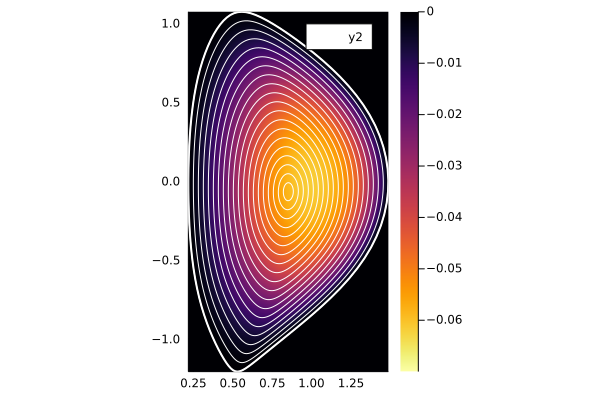

  0.719817 seconds (428.48 k allocations: 12.656 MiB, 1.39% gc time)


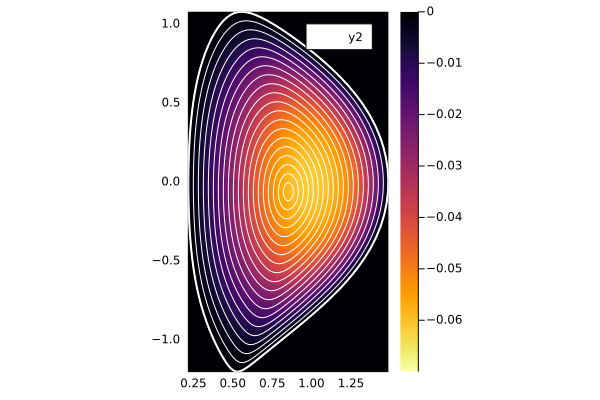

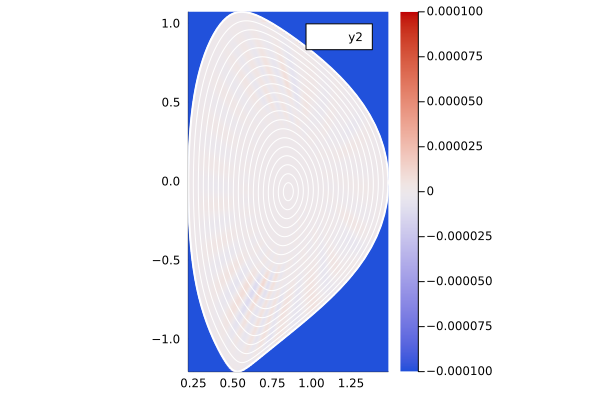

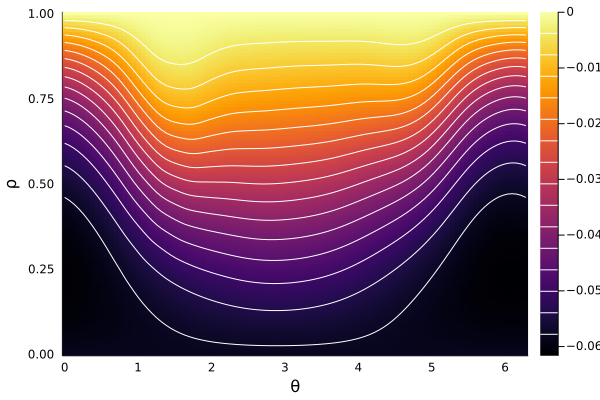

In [206]:
Rs = range(minimum(Rbnd), maximum(Rbnd), 201)
Zs = range(minimum(Zbnd), maximum(Zbnd), 201)

@time P2 = Psi(Ψ, Rs, Zs)
cmap = cgrad(:inferno, rev=true)
p = heatmap(Rs, Zs, P2, aspect_ratio=:equal, c=cmap, clim=(-0.07,-0.0))
plot!(p, Rbnd, Zbnd, color=:white, lw=2, xrange=(Rs[1], Rs[end]), yrange=(Zs[1], Zs[end]))
@views for S in eachcol(shot.surfaces[:,2:end])
    plot!(p, MXH(S), lw=1, color=:white)
end
display(p)

@time P1 = G(shot, Rs, Zs, R0s, Z0s, ϵs, κs, c0s, cs, ss)
p = heatmap(Rs, Zs, P1, aspect_ratio=:equal, c=cmap, clim=(-0.07 ,-0.00))
plot!(p, Rbnd, Zbnd, color=:white, lw=2, xrange=(Rs[1], Rs[end]), yrange=(Zs[1], Zs[end]))
@views for S in eachcol(shot.surfaces[:,2:end])
    plot!(p, MXH(S), lw=1, color=:white)
end
display(p)


p = heatmap(Rs, Zs, P1-P2, aspect_ratio=:equal, c=:diverging, clim=(-0.0001 , 0.0001))
plot!(p, Rbnd, Zbnd, color=:white, lw=2, xrange=(Rs[1], Rs[end]), yrange=(Zs[1], Zs[end]))
@views for S in eachcol(shot.surfaces[:,2:end])
    plot!(p, MXH(S), lw=1, color=:white)
end
display(p)

plot_shot(shot, :ρθ)

(9, 0.4, -1.5707963267948966, 10, 0.45, -1.426430222446984)
(0.4482580204644031, -1.4314598784351427)
Iter     Function value      Lower bound       Upper bound       Best bound
(0.4190983005625053, -1.5707963267948966, -1.5707963267948966)
     0     7.197670e-04      4.000000e-01      4.500000e-01      initial
(0.4309016994374948, -1.5707963267948966, -1.5707963267948966)
     1     7.197670e-04      4.000000e-01      4.309017e-01      initial
(0.4118033988749895, -1.5707963267948966, -1.5707963267948966)
     2     6.256351e-04      4.000000e-01      4.190983e-01      upper
(0.4072949016875158, -1.5707963267948966, -1.5707963267948966)
     3     5.715540e-04      4.000000e-01      4.118034e-01      upper
(0.4045084971874737, -1.5707963267948966, -1.5707963267948966)
     4     5.396490e-04      4.000000e-01      4.072949e-01      upper
(0.4027864045000421, -1.5707963267948966, -1.5707963267948966)
     5     5.205002e-04      4.000000e-01      4.045085e-01      upper
(0.40172209268

In [125]:
function res!(Δ, x::Vector{<:Real}, R0fe::FE_rep, Z0fe::FE_rep, ϵfe::FE_rep, κfe::FE_rep, c0fe::FE_rep,
                  cfe::AbstractVector{<:FE_rep}, sfe::AbstractVector{<:FE_rep}, R::Real, Z::Real)
    ρ = x[1]
    θ = x[2]
    
    R0 = R0fe(ρ)
    Z0 = Z0fe(ρ)
    ϵ = ϵfe(ρ)
    κ = κfe(ρ)
    
    a = R0 * ϵ
    
    c0 = c0fe(ρ)
    
    θr = θ + c0
    @inbounds for m in eachindex(cfe)
        @views sm = sfe[m]
        @views cm = cfe[m]
        S = sm(ρ)
        C = cm(ρ)
        θr += dot((S, C), sincos(m * θ))
    end
    
    Δ[1] = R0 + a * cos(θr) - R
    Δ[2] = Z0 - a * κ * sin(θ) - Z
    return Δ
end

function ρθ_RZ2(shot::Shot, R::Real, Z::Real, R0::FE_rep, Z0::FE_rep, ϵ::FE_rep, κ::FE_rep, c0::FE_rep, 
                c::AbstractVector{<:FE_rep}, s::AbstractVector{<:FE_rep};
                method::Symbol=:trust_region)
    
    x0 = collect(ρθ_RZ(shot, R, Z))
    
    f!(F, x) = res!(F, x, R0, Z0, ϵ, κ, c0, c, s, R, Z)
    result = nlsolve(f!, x0, autodiff = :forward; method)
    return result.zero
end;

In [126]:
#println(ρθ_RZ(shot, 1.0, 0.5))
#@btime ρθ_RZ(shot, 1.0, 0.5)
R0s, Z0s, ϵs, κs, c0s, cs, ss = surfaces_FE(shot)
println(ρθ_RZ(shot, 1.0, 0.5, R0s, Z0s, ϵs, κs, c0s, cs, ss))
@btime ρθ_RZ(shot, 1.0, 0.5, R0s, Z0s, ϵs, κs, c0s, cs, ss)
println(ρθ_RZ2(shot, 1.0, 0.5, R0s, Z0s, ϵs, κs, c0s, cs, ss, method=:trust_region))
@btime ρθ_RZ2(shot, 1.0, 0.5, R0s, Z0s, ϵs, κs, c0s, cs, ss, method=:trust_region)

(0.6266518283177511, -0.918440172011076)
  10.103 μs (11 allocations: 368 bytes)
[0.6266518312990508, -0.9184401657606467]
  11.364 μs (130 allocations: 8.12 KiB)


2-element Vector{Float64}:
  0.6266518312990508
 -0.9184401657606467

In [129]:
function g2(shot, r, z, R0s, Z0s, ϵs, κs, c0s, cs, ss)
    ρ, θ = ρθ_RZ2(shot, r, z, R0s, Z0s, ϵs, κs, c0s, cs, ss)
    return psi_ρθ(shot, ρ, θ)
end
function G2(shot, Rs, Zs, R0s, Z0s, ϵs, κs, c0s, cs, ss)
    N = length(Rs)
    M = zeros(N,N)
    for (i,r) in enumerate(Rs)
        for (j,z) in enumerate(Zs)
            M[j,i] = g(shot, r, z, R0s, Z0s, ϵs, κs, c0s, cs, ss)
        end
    end
    return M #[g(shot, r, z) for z in Zs, r in Rs]
end

G2 (generic function with 2 methods)

  0.062976 seconds (26.01 k allocations: 873.875 KiB)


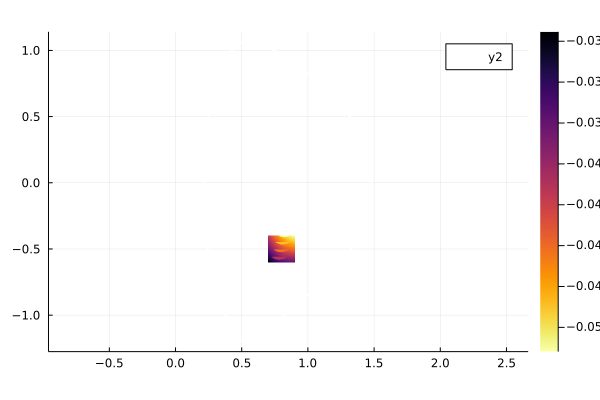

In [135]:

@time P1 = G2(shot, Rs, Zs, R0s, Z0s, ϵs, κs, c0s, cs, ss)
p = heatmap(Rs, Zs, P1, aspect_ratio=:equal, c=cmap)#, clim=(-0.07,-0.03))
plot!(p, Rbnd, Zbnd, color=:white, lw=2)#, xrange=(0.5, 1.0), yrange=(0., 0.5))
#@views for S in eachcol(shot.surfaces[:,2:end])
#    plot!(p, MXH(S), lw=1, color=:white)
#end
display(p)

In [ ]:
function res3(x::Vector{<:Real}, R0fe::FE_rep, Z0fe::FE_rep, ϵfe::FE_rep, κfe::FE_rep, c0fe::FE_rep,
              cfe::AbstractVector{<:FE_rep}, sfe::AbstractVector{<:FE_rep}, R::Real, Z::Real)
    ρ = x[1]
    θ = x[2]
    
    R0 = R0fe(ρ)
    Z0 = Z0fe(ρ)
    ϵ = ϵfe(ρ)
    κ = κfe(ρ)
    
    a = R0 * ϵ
    
    c0 = c0fe(ρ)
    
    θr = θ + c0
    @inbounds for m in eachindex(cfe)
        @views sm = sfe[m]
        @views cm = cfe[m]
        S = sm(ρ)
        C = cm(ρ)
        θr += dot((S, C), sincos(m * θ))
    end
    
    dR = R0 + a * cos(θr) - R
    dZ = Z0 - a * κ * sin(θ) - Z
    
    res = dR^2 + dZ^2 
    #dR = R0 + a * cos(θr) - R
    #dZ = Z0 - a * κ * sin(θ) - Z
    
    return res
end

function ρθ_RZ3(shot::Shot, R::Real, Z::Real, R0::FE_rep, Z0::FE_rep, ϵ::FE_rep, κ::FE_rep, c0::FE_rep, 
                c::AbstractVector{<:FE_rep}, s::AbstractVector{<:FE_rep};
                method=Optim.LBFGS())
    
    x0 = collect(ρθ_RZ(shot, R, Z))
    ki, ρi, θi, ko, ρo, θo = ρθ_io(shot, R, Z)
    Δ = [0.0, 0.0]
    #lower = [ρi, min(θo, θi)]
    #upper = [ρo, max(θi, θo)]
    
    function f(x)
        return res3(x, R0, Z0, ϵ, κ, c0, c, s, R, Z)
        #return Δ[1]^2 + Δ[2]^2
    end
    #algo = Optim.Fminbox(inner_optimizer)
    #options = Optim.Options();
    res = Optim.optimize(f, x0, method; autodiff=:forward)
    return res.minimizer
    
end;

In [ ]:
println(ρθ_RZ(shot, 1.0, 0.5, R0s, Z0s, ϵs, κs, c0s, cs, ss))
#@btime ρθ_RZ(shot, 1.0, 0.5, R0s, Z0s, ϵs, κs, c0s, cs, ss)
#println(ρθ_RZ2(shot, 1.0, 0.5, R0s, Z0s, ϵs, κs, c0s, cs, ss, method=:newton))
#@btime ρθ_RZ2(shot, 1.0, 0.5, R0s, Z0s, ϵs, κs, c0s, cs, ss, method=:newton)
method = Optim.NewtonTrustRegion()
println(ρθ_RZ3(shot, 1.0, 0.5, R0s, Z0s, ϵs, κs, c0s, cs, ss; method))
@btime ρθ_RZ3(shot, 1.0, 0.5, R0s, Z0s, ϵs, κs, c0s, cs, ss; method)
